In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Save and explore CSV file
all_data = pd.read_csv("all_data.csv")
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13
Median Life Expectancy at Birth:  76.75
Median GDP:  1280220000000.0
Chile              

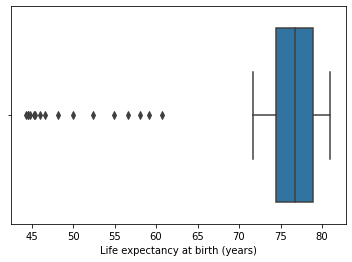

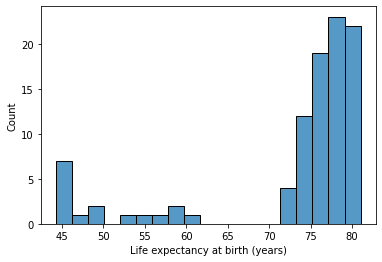

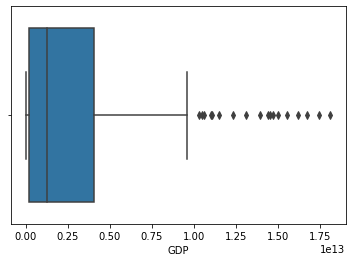

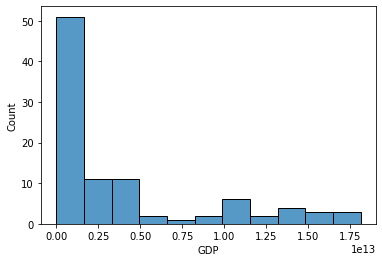

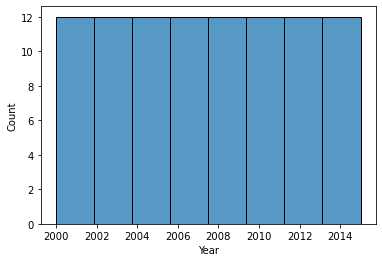

<Figure size 432x288 with 0 Axes>

In [12]:
## Initial exploration of data with summary statistics, boxplot and histplot of all data
print(all_data.describe(include = 'all'))
print('Median Life Expectancy at Birth: ', np.median(all_data['Life expectancy at birth (years)']))
print('Median GDP: ', np.median(all_data.GDP))

print(all_data.Country.value_counts())

sns.boxplot(data = all_data, x = 'Life expectancy at birth (years)')
plt.show()
plt.clf()

sns.histplot(x = 'Life expectancy at birth (years)', data = all_data)
plt.show()
plt.clf()

sns.boxplot(data = all_data, x = 'GDP')
plt.show()
plt.clf()

sns.histplot(x = 'GDP', data = all_data)
plt.show()
plt.clf()

sns.histplot(x = 'Year', data = all_data)
plt.show()
plt.clf()

       Country         Year  Life expectancy at birth (years)           GDP
count       16    16.000000                         16.000000  1.600000e+01
unique       1          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         78.943750  1.697888e+11
std        NaN     4.760952                          1.058911  7.687884e+10
min        NaN  2000.000000                         77.300000  6.973681e+10
25%        NaN  2003.750000                         77.975000  9.387303e+10
50%        NaN  2007.500000                         79.000000  1.729975e+11
75%        NaN  2011.250000                         79.825000  2.449515e+11
max        NaN  2015.000000                         80.500000  2.783840e+11
Median Life Expectancy at Birth in Chile:  79.0
Median GDP:  172997500000.0


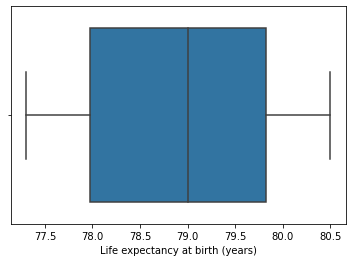

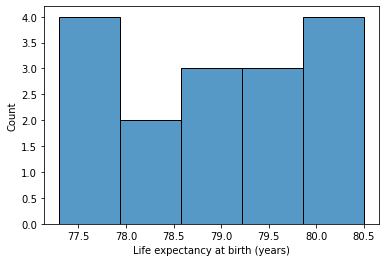

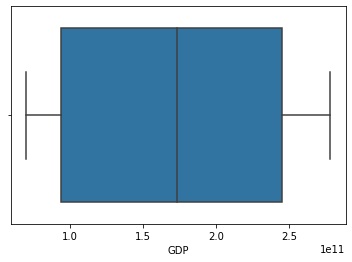

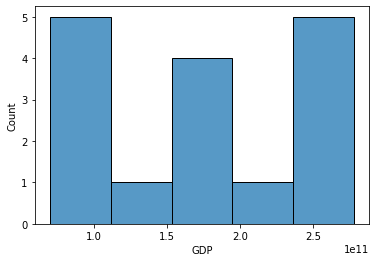

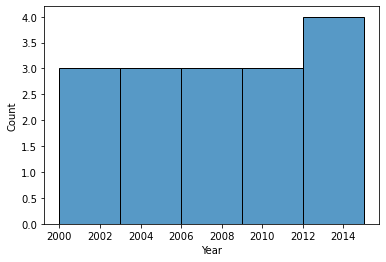

<Figure size 432x288 with 0 Axes>

In [18]:
# a look at Chile only
chile_data = all_data[all_data.Country == 'Chile']

# summary statistics and plots for Chile
print(chile_data.describe(include = 'all'))
print('Median Life Expectancy at Birth in Chile: ', np.median(chile_data['Life expectancy at birth (years)']))
print('Median GDP: ', np.median(chile_data.GDP))


sns.boxplot(data = chile_data, x = 'Life expectancy at birth (years)')
plt.show()
plt.clf()

sns.histplot(x = 'Life expectancy at birth (years)', data = chile_data)
plt.show()
plt.clf()

sns.boxplot(data = chile_data, x = 'GDP')
plt.show()
plt.clf()

sns.histplot(x = 'GDP', data = chile_data)
plt.show()
plt.clf()


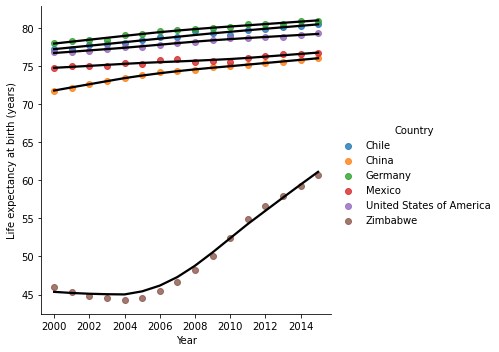

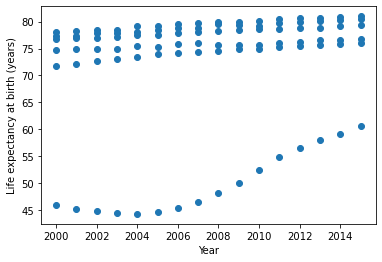

<Figure size 432x288 with 0 Axes>

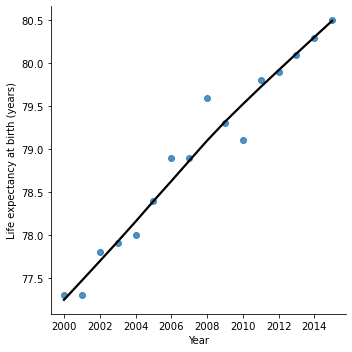

<Figure size 432x288 with 0 Axes>

In [32]:
# Has life expectancy increased over time in the six nations?

sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', data = all_data, line_kws={'color': 'black'}, lowess=True, hue = 'Country')
plt.show()
plt.clf()

plt.scatter(all_data.Year, all_data['Life expectancy at birth (years)'])
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

# The lowest outlier (Zimbabwe) showed an initial decrease from 2000 to 2005 followed by the most drastic increase during the study
# the remaining all showed gradual increased over time

# a look at just Chile 
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', data = chile_data, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

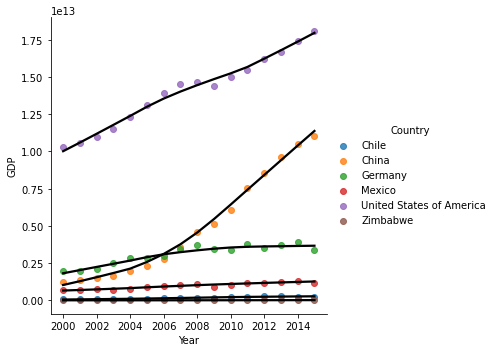

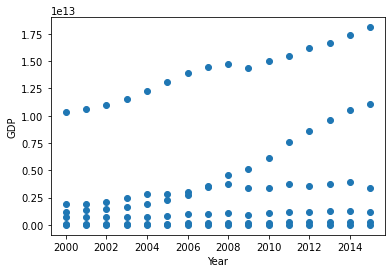

<Figure size 432x288 with 0 Axes>

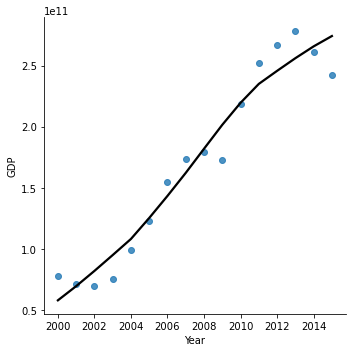

<Figure size 432x288 with 0 Axes>

In [34]:
# Has GDP increased over time in the six nations?

sns.lmplot(x = 'Year', y = 'GDP', data = all_data, line_kws={'color': 'black'}, lowess=True, hue = 'Country')
plt.show()
plt.clf()

plt.scatter(all_data.Year, all_data.GDP)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

# The highest outlier makes it difficult to draw data from the whole. Looking at individual countries would help to beat the skew.
# However, the line does show that overall, the GDP of these six countries is higher in 2015 than in 2000.

# a look at just Chile shows the data better
sns.lmplot(x = 'Year', y = 'GDP', data = chile_data, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

In [56]:
# What is the average life expectancy in these nations?

unique_country = all_data.Country.unique()
for country in unique_country:
    print('The average life expectancy for', country, 'is')
    country = all_data[all_data.Country == country]
    print(round(np.mean(country['Life expectancy at birth (years)']), 2), 'years')

print('The average life expectancy for all six countries is')
print(round(np.mean(all_data['Life expectancy at birth (years)']), 2), 'years')

The average life expectancy for Chile is
78.94 years
The average life expectancy for China is
74.26 years
The average life expectancy for Germany is
79.66 years
The average life expectancy for Mexico is
75.72 years
The average life expectancy for United States of America is
78.06 years
The average life expectancy for Zimbabwe is
50.09 years
The average life expectancy for all six countries is
72.79 years


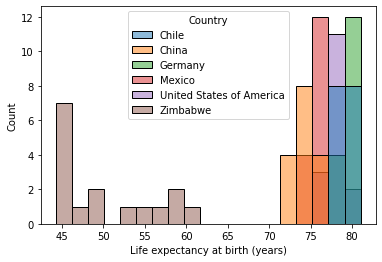

In [58]:
# What is the distribution of that life expectancy?

sns.histplot(x = 'Life expectancy at birth (years)', data = all_data, hue = 'Country')
plt.show()

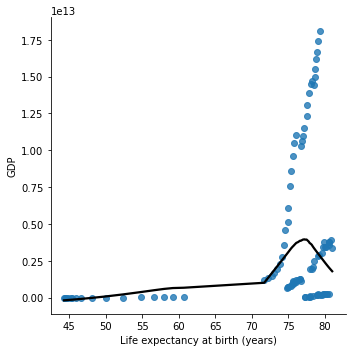

<Figure size 432x288 with 0 Axes>

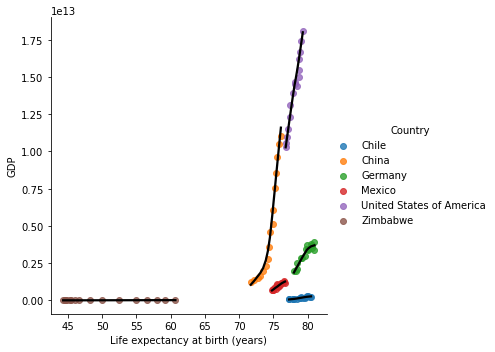

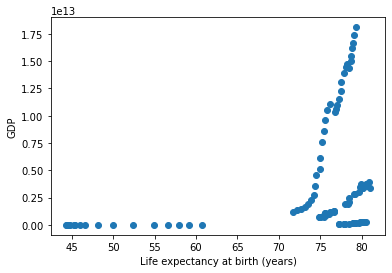

<Figure size 432x288 with 0 Axes>

In [66]:
# Comparing life expectancy and GDP

sns.lmplot(x = 'Life expectancy at birth (years)', y = 'GDP', data = all_data, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

sns.lmplot(x = 'Life expectancy at birth (years)', y = 'GDP', data = all_data, line_kws={'color': 'black'}, lowess=True, hue = 'Country')
plt.show()
plt.clf()


plt.scatter(all_data['Life expectancy at birth (years)'], all_data.GDP)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.show()
plt.clf()

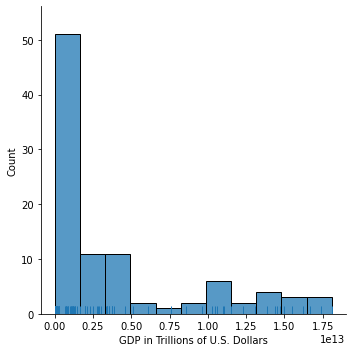

<Figure size 432x288 with 0 Axes>

In [69]:

sns.displot(all_data.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

C:\Users\dtta2\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


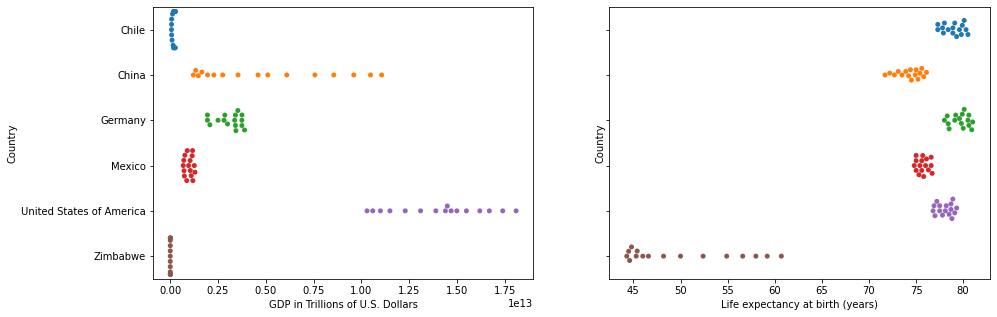

In [71]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=all_data.GDP, y=all_data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=all_data['Life expectancy at birth (years)'], y=all_data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

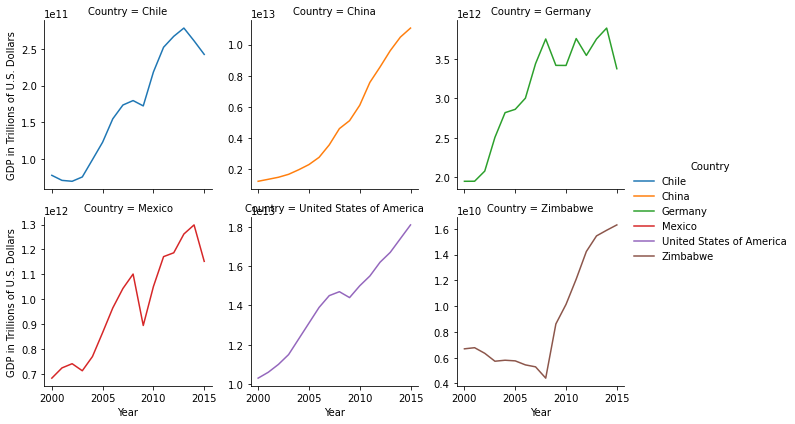

In [73]:
# looking at GDP per country in order to see the growth of the other countries outside of China and the US, which dwarves the other data

graphGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP

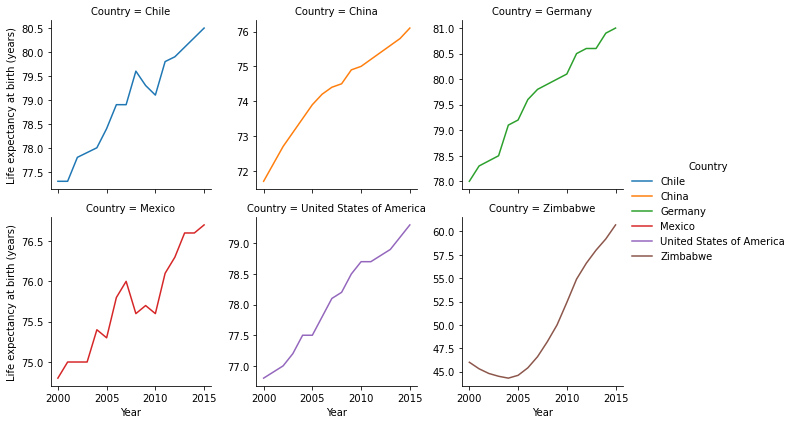

In [74]:
graphLEABY = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","Life expectancy at birth (years)")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

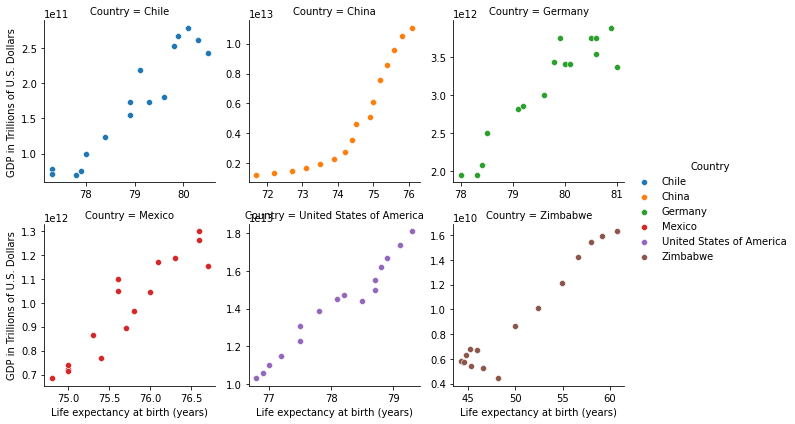

In [75]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
